In [ ]:
# Visualizing Data
# Play with each program by changing data values. 

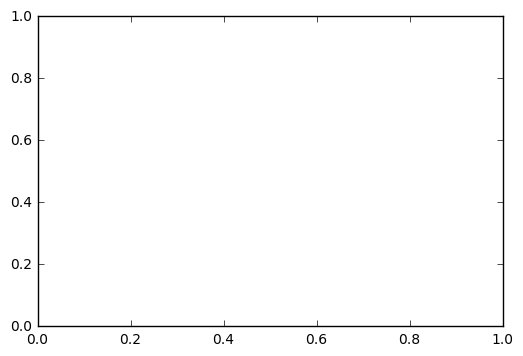

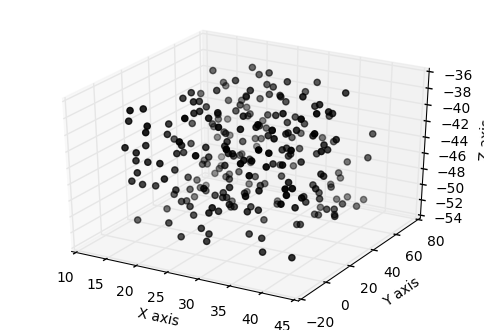

In [2]:
# Plotting 3D scatter plots

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the number of values
n = 250

# Create a lambda function to generate the random values in the given range
f = lambda minval, maxval, n: minval + (maxval - minval) * np.random.rand(n)

# Generate the values
x_vals = f(15, 41, n)
y_vals = f(-10, 70, n)
z_vals = f(-52, -37, n)

# Plot the values
ax.scatter(x_vals, y_vals, z_vals, c='k', marker='o')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()

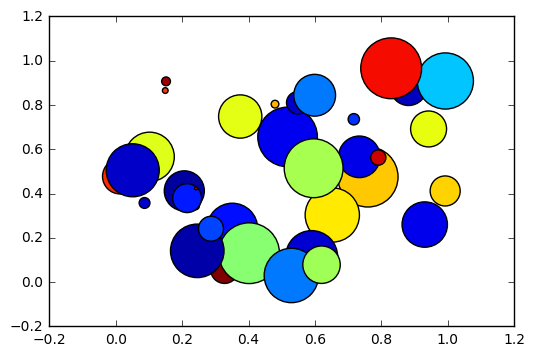

In [3]:
# Plotting bubble plots

import numpy as np
import matplotlib.pyplot as plt

# Define the number of values
num_vals = 40

# Generate random values
x = np.random.rand(num_vals)
y = np.random.rand(num_vals)

# Define area for each bubble
# Max radius is set to a specified value
max_radius = 25
area = np.pi * (max_radius * np.random.rand(num_vals)) ** 2  

# Generate colors
colors = np.random.rand(num_vals)

# Plot the points
plt.scatter(x, y, s=area, c=colors, alpha=1.0)

plt.show()

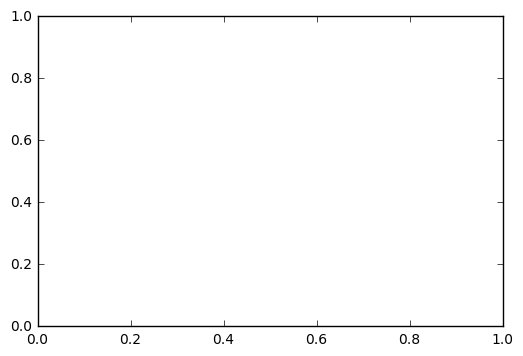

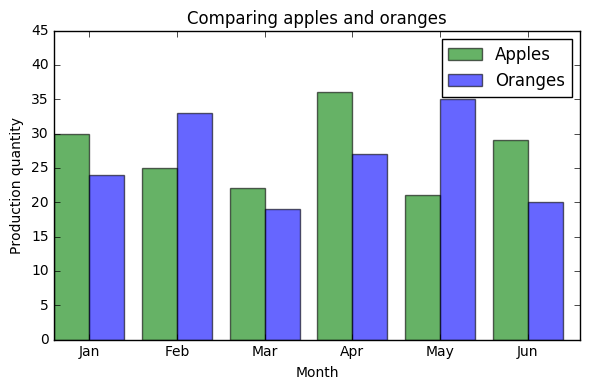

In [5]:
# Plotting histograms

import numpy as np
import matplotlib.pyplot as plt

# Input data
apples = [30, 25, 22, 36, 21, 29]
oranges = [24, 33, 19, 27, 35, 20]

# Number of groups
num_groups = len(apples)

# Create the figure
fig, ax = plt.subplots()

# Define the X axis
indices = np.arange(num_groups)

# Width and opacity of histogram bars
bar_width = 0.4
opacity = 0.6

# Plot the values
hist_apples = plt.bar(indices, apples, bar_width, 
        alpha=opacity, color='g', label='Apples')

hist_oranges = plt.bar(indices + bar_width, oranges, bar_width,
        alpha=opacity, color='b', label='Oranges')

plt.xlabel('Month')
plt.ylabel('Production quantity')
plt.title('Comparing apples and oranges')
plt.xticks(indices + bar_width, ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'))
plt.ylim([0, 45])
plt.legend()
plt.tight_layout()

plt.show()

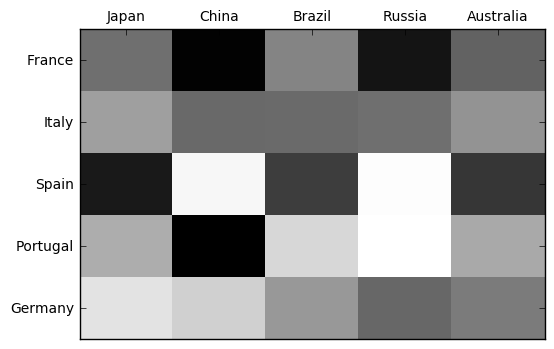

In [8]:
# Visualizing heat maps

import numpy as np
import matplotlib.pyplot as plt

# Define the two groups 
group1 = ['France', 'Italy', 'Spain', 'Portugal', 'Germany'] 
group2 = ['Japan', 'China', 'Brazil', 'Russia', 'Australia']

# Generate some random values
data = np.random.rand(5, 5)

# Create a figure
fig, ax = plt.subplots()

# Create the heat map
heatmap = ax.pcolor(data, cmap=plt.cm.gray)

# Add major ticks at the middle of each cell
ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)

# Make it look like a table 
ax.invert_yaxis()
ax.xaxis.tick_top()

# Add tick labels
ax.set_xticklabels(group2, minor=False)
ax.set_yticklabels(group1, minor=False)

plt.show()

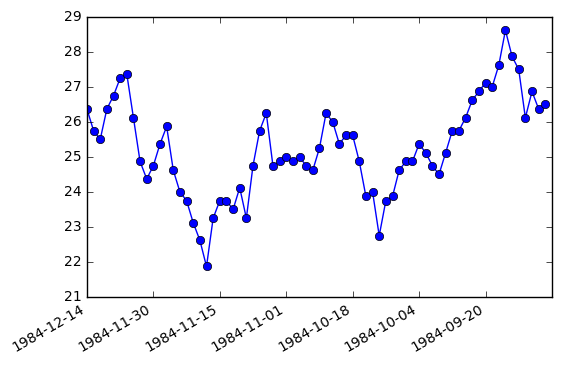

In [7]:
# Plotting date-formatted time-series data

import numpy
import matplotlib.pyplot as plt
from matplotlib.mlab import csv2rec
import matplotlib.cbook as cbook
from matplotlib.ticker import Formatter

# Define a class for formatting
class DataFormatter(Formatter):
    def __init__(self, dates, date_format='%Y-%m-%d'):
        self.dates = dates
        self.date_format = date_format

    # Extact the value at time t at position 'position'
    def __call__(self, t, position=0):
        index = int(round(t))
        if index >= len(self.dates) or index < 0:
            return ''

        return self.dates[index].strftime(self.date_format)

if __name__=='__main__':
    # CSV file containing the stock quotes 
    input_file = cbook.get_sample_data('aapl.csv', asfileobj=False)

    # Load csv file into numpy record array
    data = csv2rec(input_file)
    
    # Take a subset for plotting
    data = data[-70:]

    # Create the date formatter object
    formatter = DataFormatter(data.date)

    # X axis
    x_vals = numpy.arange(len(data))

    # Y axis values are the closing stock quotes
    y_vals = data.close 

    # Plot data
    fig, ax = plt.subplots()
    ax.xaxis.set_major_formatter(formatter)
    ax.plot(x_vals, y_vals, 'o-')
    fig.autofmt_xdate()
    plt.show()